Introduction

This is an event log of an incident management process extracted from data gathered from the audit system of an instance of the ServiceNowTM platform used by an IT company. The event log is enriched with data loaded from a relational database underlying a corresponding process-aware information system. Information was anonymized for privacy.



Variable Information

1. number: incident identifier (24,918 different values);
2. incident state: eight levels controlling the incident management process transitions from opening until closing the case;
3. active: boolean attribute that shows whether the record is active or closed/canceled;
4. reassignment_count: number of times the incident has the group or the support analysts changed;
5. reopen_count: number of times the incident resolution was rejected by the caller;
6. sys_mod_count: number of incident updates until that moment;
7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
8. caller_id: identifier of the user affected;
9. opened_by: identifier of the user who reported the incident;
10. opened_at: incident user opening date and time;
11. sys_created_by: identifier of the user who registered the incident;
12. sys_created_at: incident system creation date and time;
13. sys_updated_by: identifier of the user who updated the incident and generated the current log record;
14. sys_updated_at: incident system update date and time;
15. contact_type: categorical attribute that shows by what means the incident was reported;
16. location: identifier of the location of the place affected;
17. category: first-level description of the affected service;
18. subcategory: second-level description of the affected service (related to the first level description, i.e., to category);
19. u_symptom: description of the user perception about service availability;
20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
21. impact: description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low);
22. urgency: description of the urgency informed by the user for the incident resolution (values: 1â€“High; 2â€“Medium; 3â€“Low);
23. priority: calculated by the system based on 'impact' and 'urgency';
24. assignment_group: identifier of the support group in charge of the incident;
25. assigned_to: identifier of the user in charge of the incident;
26. knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
27. u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked;
28. notify: categorical attribute that shows whether notifications were generated for the incident;
29. problem_id: identifier of the problem associated with the incident;
30. rfc: (request for change) identifier of the change request associated with the incident;
31. vendor: identifier of the vendor in charge of the incident;
32. caused_by: identifier of the RFC responsible by the incident;
33. close_code: identifier of the resolution of the incident;
34. resolved_by: identifier of the user who resolved the incident;
35. resolved_at: incident user resolution date and time (dependent variable);
36. closed_at: incident user close date and time (dependent variable).

In [1]:
import pandas as pd
import numpy as np


Loading the Dataset


The dataset is stored as a CSV file.  
We specify the file path and use `pd.read_csv()` to load it into a DataFrame.

#  To Display the first five rows

df.head() → shows the first 5 rows

  

In [2]:
filepath ='C:\Personal\Learning\Final Project\incident_event_log.csv'
df=pd.read_csv(filepath)
#to display the first Five rows
print(df.head())

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\revat\AppData\Local\Temp\ipykernel_21260\3141093825.py:1: SyntaxWarning: invalid escape sequence '\P'
  filepath ='C:\Personal\Learning\Final Project\incident_event_log.csv'


       number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000047            New    True                   0             0   
2  INC0000057            New    True                   0             0   
3  INC0000060            New    True                   0             0   
4  INC0000062            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by         opened_at  \
0              0      True  Caller 2403    Opened by  8  29-02-2016 01:16   
1              0      True  Caller 2403  Opened by  397  29-02-2016 04:40   
2              0      True  Caller 4416    Opened by  8  29-02-2016 06:10   
3              0      True  Caller 4491  Opened by  180  29-02-2016 06:38   
4              0      True  Caller 3765  Opened by  180  29-02-2016 06:58   

   ...         notify problem_id        rfc     vendor  caused_by closed_code  \
0  ...  Do 

To get summary of your DataFrame.->df.info() 
Output of df.shows() contains:
- Index range → e.g. RangeIndex: 1000 entries, 0 to 999 (number of rows)
- Column names → each column in your CSV
- Non-null counts → how many values are present vs. missing in each column
- Data types → like int64, float64, object (object usually means string/text)
- Memory usage → how much RAM the DataFrame takes


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

The `df.describe()` function in pandas generates a **summary of descriptive statistics** for the numeric columns in a DataFrame.  

### Default Output
By default, it includes only numeric columns (`int64`, `float64`) and provides:
- **count** → number of non-null entries  
- **mean** → average value  
- **std** → standard deviation (spread of values)  
- **min** → smallest value  
- **25%** → first quartile (Q1)  
- **50%** → median (Q2)  
- **75%** → third quartile (Q3)  
- **max** → largest value  



In [5]:
print(df.describe())

       reassignment_count   reopen_count  sys_mod_count
count       141712.000000  141712.000000  141712.000000
mean             1.104197       0.021918       5.080946
std              1.734673       0.207302       7.680652
min              0.000000       0.000000       0.000000
25%              0.000000       0.000000       1.000000
50%              1.000000       0.000000       3.000000
75%              1.000000       0.000000       6.000000
max             27.000000       8.000000     129.000000


## 🔎 Understanding `df.dtypes`

The `df.dtypes` attribute in pandas displays the **data type** of each column in a DataFrame.  
This is useful for quickly checking whether columns are stored as integers, floats, strings (objects), or other types.


In [7]:
print(df.dtypes)

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

# 📐 Checking the Shape of the Dataset

The `df.shape` attribute in pandas returns a tuple representing the **dimensions** of the DataFrame:
- The first value → number of **rows**
- The second value → number of **columns**


In [12]:
#No of rows and columns in the initial phase
rows,cols=df.shape
print("No of rows : ",rows)
print("No of columns " , cols)

No of rows :  141712
No of columns  36


In [15]:
print(df.shape)


(141712, 36)


## 🧹 Removing Duplicate Rows

The `drop_duplicates()` function in pandas is used to remove duplicate rows from a DataFrame.her we are removing duplicate rows based on unique identifier number and to keep first row only. Changes are made in original dataset

In [5]:

df.drop_duplicates(subset='number',keep='first',inplace=True)

In [ ]:
No of rows and columns after removing duplicate data

In [6]:

rows,cols=df.shape
print("No of rows : ",rows)
print("No of columns " , cols)

No of rows :  24918
No of columns  36


## 🕵️ Checking for Missing Values

The `df.isnull().sum()` command in pandas is used to identify **missing values** in a DataFrame.
The `df.isna()` function in pandas is used to identify **missing values** (`NaN`) in a DataFrame.




In [32]:
df.isnull().sum()

number                        0
incident_state                0
active                        0
reassignment_count            0
reopen_count                  0
sys_mod_count                 0
made_sla                      0
caller_id                     0
opened_by                     0
opened_at                     0
sys_created_by                0
sys_created_at                0
sys_updated_by                0
sys_updated_at                0
contact_type                  0
location                      0
category                      0
subcategory                   0
u_symptom                     0
cmdb_ci                       0
impact                        0
urgency                       0
priority                      0
assignment_group              0
assigned_to                   0
knowledge                     0
u_priority_confirmation       0
notify                        0
problem_id                    0
rfc                           0
vendor                        0
caused_b

In [8]:
df.isna()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141693,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141704,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 🔄 Replacing Values in a DataFrame

The `replace()` function in pandas is used to substitute specific values in a DataFrame with new ones.Here all ? values are replaced with "Not Found"


In [10]:
df.replace('?','Not found',inplace=True)

In [11]:
df

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,Not found,Not found,Not found,Not found,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,Not found,Not found,Not found,Not found,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
13,INC0000057,New,True,0,0,0,True,Caller 4416,Opened by 8,29/2/2016 06:10,...,False,Do Not Notify,Not found,Not found,Not found,Not found,code 10,Resolved by 5,1/3/2016 02:55,6/3/2016 03:00
20,INC0000060,New,True,0,0,0,True,Caller 4491,Opened by 180,29/2/2016 06:38,...,False,Do Not Notify,Not found,Not found,Not found,Not found,code 3,Resolved by 113,2/3/2016 12:06,7/3/2016 13:00
24,INC0000062,New,True,0,0,0,True,Caller 3765,Opened by 180,29/2/2016 06:58,...,False,Do Not Notify,Not found,Not found,Not found,Not found,code 7,Resolved by 62,29/2/2016 15:51,5/3/2016 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141693,INC0120304,Active,True,0,0,0,True,Caller 90,Opened by 8,15/2/2017 02:02,...,False,Do Not Notify,Not found,Not found,Not found,Not found,code 6,Resolved by 5,17/2/2017 00:47,17/2/2017 00:50
141696,INC0120319,New,True,0,0,0,True,Caller 1899,Opened by 508,15/2/2017 07:09,...,False,Do Not Notify,Not found,Not found,Not found,Not found,code 6,Not found,Not found,15/2/2017 07:09
141698,INC0120495,New,True,0,0,0,True,Caller 323,Opened by 14,15/2/2017 11:58,...,False,Do Not Notify,Not found,Not found,Not found,Not found,Not found,Not found,Not found,16/2/2017 09:51
141704,INC0120835,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 09:09,...,False,Do Not Notify,Not found,Not found,Not found,Not found,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53


## 💾 Exporting DataFrame to CSV

The `to_csv()` function in pandas is used to save a DataFrame as a **CSV file**.Changes are made in original file with the below code

In [12]:
df.to_csv(filepath, index=False)

Creates new column names Resolution time by subtracting resolved time and opened time.  For that , initially the datatypes are converted to datetime and then the operation is performed
After operation, replacing blank values with  No data available in the derived column Resolution Time

In [34]:


df['opened_at']=pd.to_datetime(df['opened_at'],dayfirst=True,errors='coerce')
df['resolved_at']=pd.to_datetime(df['resolved_at'],dayfirst=True,errors='coerce')
#print(df['resolved_at'].isna().sum())
df['Resolution time']= df['resolved_at']-df['opened_at']
df['Resolution time']=df['Resolution time'].fillna("No data available")
df.to_csv(filepath, index=False)
df

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,Resolution time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,Not found,Not found,Not found,Not found,code 5,Resolved by 149,2016-02-29 11:29:00,05-03-2016 12:00,0 days 10:13:00
1,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,Not found,Not found,Not found,Not found,code 5,Resolved by 81,2016-03-01 09:52:00,06-03-2016 10:00,1 days 05:12:00
2,INC0000057,New,True,0,0,0,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,...,Do Not Notify,Not found,Not found,Not found,Not found,code 10,Resolved by 5,2016-03-01 02:55:00,06-03-2016 03:00,0 days 20:45:00
3,INC0000060,New,True,0,0,0,True,Caller 4491,Opened by 180,2016-02-29 06:38:00,...,Do Not Notify,Not found,Not found,Not found,Not found,code 3,Resolved by 113,2016-03-02 12:06:00,07-03-2016 13:00,2 days 05:28:00
4,INC0000062,New,True,0,0,0,True,Caller 3765,Opened by 180,2016-02-29 06:58:00,...,Do Not Notify,Not found,Not found,Not found,Not found,code 7,Resolved by 62,2016-02-29 15:51:00,05-03-2016 16:00,0 days 08:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24913,INC0120304,Active,True,0,0,0,True,Caller 90,Opened by 8,2017-02-15 02:02:00,...,Do Not Notify,Not found,Not found,Not found,Not found,code 6,Resolved by 5,2017-02-17 00:47:00,17-02-2017 00:50,1 days 22:45:00
24914,INC0120319,New,True,0,0,0,True,Caller 1899,Opened by 508,2017-02-15 07:09:00,...,Do Not Notify,Not found,Not found,Not found,Not found,code 6,Not found,NaT,15-02-2017 07:09,No data available
24915,INC0120495,New,True,0,0,0,True,Caller 323,Opened by 14,2017-02-15 11:58:00,...,Do Not Notify,Not found,Not found,Not found,Not found,Not found,Not found,NaT,16-02-2017 09:51,No data available
24916,INC0120835,Active,True,0,0,0,True,Caller 116,Opened by 12,2017-02-16 09:09:00,...,Do Not Notify,Not found,Not found,Not found,Not found,code 9,Resolved by 9,2017-02-16 09:53:00,16-02-2017 09:53,0 days 00:44:00


# To filter the rows   whose resolution code is code 15 and required notification by sending mail

In [40]:

filtered_notify= df[(df['notify']=='Send Email')&(df['closed_code']=='code 15')]
filtered_notify

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,Resolution time
2409,INC0003749,New,True,0,0,0,True,Caller 4741,Opened by 465,2016-03-07 16:05:00,...,Send Email,Not found,Not found,Not found,Not found,code 15,Resolved by 181,2016-03-22 11:56:00,27-03-2016 11:59,14 days 19:51:00
2792,INC0004346,New,True,0,0,0,True,Caller 1865,Opened by 172,2016-03-08 14:25:00,...,Send Email,Not found,Not found,Not found,Not found,code 15,Resolved by 181,2016-03-22 11:37:00,27-03-2016 11:59,13 days 21:12:00
2793,INC0004347,New,True,0,0,0,True,Caller 1865,Opened by 172,2016-03-08 14:25:00,...,Send Email,Not found,Not found,Not found,Not found,code 15,Resolved by 181,2016-03-22 11:38:00,27-03-2016 11:59,13 days 21:13:00
2816,INC0004378,New,True,0,0,0,True,Caller 1865,Opened by 172,2016-03-08 15:04:00,...,Send Email,Not found,Not found,Not found,Not found,code 15,Resolved by 181,2016-03-22 11:40:00,27-03-2016 11:59,13 days 20:36:00
2884,INC0004490,New,True,0,0,0,True,Caller 99,Opened by 10,2016-03-08 18:19:00,...,Send Email,Not found,Not found,Not found,Not found,code 15,Resolved by 181,2016-03-22 11:58:00,27-03-2016 11:59,13 days 17:39:00
2922,INC0004586,New,True,0,0,0,True,Caller 1267,Opened by 119,2016-03-09 07:55:00,...,Send Email,Not found,Not found,Not found,Not found,code 15,Resolved by 181,2016-03-22 11:41:00,27-03-2016 11:59,13 days 03:46:00
2923,INC0004587,New,True,0,0,0,True,Caller 1267,Opened by 119,2016-03-09 07:55:00,...,Send Email,Not found,Not found,Not found,Not found,code 15,Resolved by 181,2016-03-22 11:42:00,27-03-2016 11:59,13 days 03:47:00
2981,INC0004671,New,True,0,0,0,True,Caller 2493,Opened by 237,2016-03-09 09:37:00,...,Send Email,Not found,Not found,Not found,Not found,code 15,Resolved by 181,2016-03-22 12:19:00,27-03-2016 12:59,13 days 02:42:00
3084,INC0004851,New,True,0,0,0,True,Caller 3029,Opened by 277,2016-03-09 11:55:00,...,Send Email,Not found,Not found,Not found,Not found,code 15,Resolved by 181,2016-03-22 12:22:00,27-03-2016 12:59,13 days 00:27:00
3565,INC0005708,New,True,0,0,0,True,Caller 3136,Opened by 296,2016-03-11 06:58:00,...,Send Email,Not found,Not found,Not found,Not found,code 15,Resolved by 181,2016-03-22 12:31:00,27-03-2016 12:59,11 days 05:33:00


#User who created maximum and minimum no of incidents along with the count
#  Caller Incident Analysis

This script analyzes the `caller_id` column in a Pandas DataFrame (`df`) to determine which caller created the maximum and minimum number of incidents.


## Functions and Methods Used

### 1. `df['caller_id'].mode()[0]`
- **Purpose:** Finds the most frequently occurring value (mode) in the `caller_id` column.
- **Returns:** The caller ID that appears most often.
- **Note:** `.mode()` returns a Series; `[0]` selects the first mode value.



### 2. `df['caller_id'].value_counts().max()`
- **Purpose:** Counts the frequency of each caller ID and returns the highest count.
- **Returns:** The maximum number of incidents raised by a single caller.



### 3. `df['caller_id'].value_counts().idxmin()`
- **Purpose:** Identifies the caller ID with the lowest frequency.
- **Returns:** The caller ID that raised the fewest incidents.



### 4. `df['caller_id'].value_counts().min()`
- **Purpose:** Returns the minimum count of incidents raised by any caller.
- **Returns:** The smallest number of incidents raised.



### 5. `print(f"...")`
- **Purpose:** Displays formatted output using **f-strings**.


In [56]:


max_cal= df['caller_id'].mode()[0]
max_callcount=df['caller_id'].value_counts().max()
min_cal=df['caller_id'].value_counts().idxmin()
min_callcount=df['caller_id'].value_counts().min()

print(f"{max_cal } created maximum no of incidents . No of incidents raised by caller is  ",max_callcount)
print(f"{min_cal } created less no of incidents . No of incidents raised by caller is  ",min_callcount)

Caller 1904 created maximum no of incidents . No of incidents raised by caller is   438
Caller 1433 created less no of incidents . No of incidents raised by caller is   1


### Grouping and Counting Assigned Records

In this step, we analyze how many records are handled by each combination of 
**assignment group** and **assigned_to**.  

- We use `groupby(['assignment_group','assigned_to'])` to group the dataset by both columns.  
- `.size()` counts the number of records in each group.  
- `.reset_index(name='count')` converts the grouped result into a DataFrame with a new column called `count`.  

This gives us a table (`res_count`) showing the workload distribution across assignment groups and individual assignees.

### Sorting by Count

To identify the busiest groups or individuals, we sort the results in descending order of `count`:

- `sort_values(by='count', ascending=False)` ensures the highest counts appear at the top.  
- The sorted DataFrame (`res_countsort`) highlights which assignment groups and assignees handle the most records.

### Output

The final table (`res_countsort`) provides a clear view of workload distribution, helping us spot:
- Top contributors or overloaded assignees  
- Groups with disproportionately high or low assignments  
- Potential areas for balancing workload


In [63]:
res_count=(df.groupby(['assignment_group','assigned_to']).size().reset_index(name='count'))
res_countsort= res_count.sort_values(by='count',ascending=False)

res_countsort


,assignment_group,assigned_to,count
1048,Group 70,Not found,4185
1067,Group 70,Resolver 13,1320
1096,Group 70,Resolver 17,1305
1160,Group 70,Resolver 33,497
109,Group 20,Not found,492
...,...,...,...
42,Group 12,Resolver 100,1
43,Group 12,Resolver 133,1
44,Group 12,Resolver 135,1
46,Group 12,Resolver 139,1


In [64]:
col_contact_type =df['contact_type']
occ_contact_type=col_contact_type.value_counts()
occ_contact_type

contact_type
Phone             24684
Self service        161
Email                61
IVR                   9
Direct opening        3
Name: count, dtype: int64

In [71]:
col_priority=df['priority']
occ_col_priority=col_priority.value_counts()
print("No of incidents with each priority")
occ_col_priority


Occurneces of priority


priority
3 - Moderate    23681
4 - Low           741
2 - High          311
1 - Critical      185
Name: count, dtype: int64

In [74]:
col_Assigngroup=df['assignment_group']
occ_col_AssignGroup=col_Assigngroup.value_counts()
print("No of Assignment Group")
occ_col_AssignGroup

No of Assignment Group


assignment_group
Group 70     12791
Group 20      1367
Not found      906
Group 25       764
Group 24       698
             ...  
Group 36         1
Group 32         1
Group 2          1
Group 13         1
Group 41         1
Name: count, Length: 70, dtype: int64

In [73]:
cor_matrix=pd.crosstab(df['priority'],df['assignment_group'])
print(cor_matrix)

assignment_group  Group 10  Group 12  Group 13  Group 14  Group 15  Group 17  \
priority                                                                       
1 - Critical             0         1         0         0         5         0   
2 - High                 5         1         0         0         0         0   
3 - Moderate           315        85         1         1        31         6   
4 - Low                  4         4         0         3         1         0   

assignment_group  Group 19  Group 2  Group 20  Group 21  ...  Group 74  \
priority                                                 ...             
1 - Critical             1        0        18         0  ...         0   
2 - High                 2        0        50         0  ...         1   
3 - Moderate            73        1      1286        35  ...        72   
4 - Low                  0        0        13         0  ...         0   

assignment_group  Group 75  Group 76  Group 77  Group 78  Group 80  Group 

### Priority-wise Top Assignment Groups

In this step, we analyze workload distribution by combining **priority** and **assignment group**:

1. **Grouping**  
   - We group the dataset by both `priority` and `assignment_group`.  
   - `.size()` counts the number of records in each group.  
   - `.reset_index(name='count')` converts the grouped result into a DataFrame with a new column called `count`.

2. **Sorting**  
   - We sort the grouped results by `priority` (ascending) and `count` (descending).  
   - This ensures that within each priority level, the assignment groups with the highest counts appear first.

3. **Selecting Top Groups**  
   - Using `.groupby("priority").head(3)`, we extract the **top 3 assignment groups for each priority level**.  
   - This highlights which groups are most frequently assigned tasks at each level of urgency.

### Output

The resulting table (`prio_count`) provides:
- A clear view of the busiest assignment groups for each priority.  
- Insight into workload distribution when urgency is considered.  
- Evidence of potential imbalances, such as certain groups consistently appearing at the top across multiple priorities.

This analysis supports **bivariate/multivariate EDA**, since it examines the relationship between `priority` and `assignment_group` together, uncovering meaningful workload patterns.


In [95]:
prio_count=(df.groupby(['priority','assignment_group']).size().reset_index(name='count').sort_values(["priority", "count"],ascending=[True, False]).groupby("priority").head(3))
prio_count




,priority,assignment_group,count
28,1 - Critical,Group 70,34
3,1 - Critical,Group 20,18
25,1 - Critical,Group 65,16
70,2 - High,Group 70,58
39,2 - High,Group 20,50
53,2 - High,Group 39,36
133,3 - Moderate,Group 70,12246
85,3 - Moderate,Group 20,1286
145,3 - Moderate,Not found,887
182,4 - Low,Group 70,453


### Grouping by Incident State, Priority, and Notify

The following operation groups the dataset by **incident_state**, **priority**, and **notify**:
Group by keys

1. incident_state, priority, and notify are used as grouping dimensions.

2. Count records

3. .size() gives the number of rows in each group.

4. Reset index

5. Converts the grouped result into a DataFrame with a new column count.

6. Sort results

      First by incident_state (ascending),

      Then by count (descending) to highlight the most frequent combinations.


In [8]:
state_prio_not =(df.groupby(['incident_state','priority','notify']).size().reset_index(name='count').sort_values(['incident_state','count'],ascending=[True,False]))
state_prio_not                           

,incident_state,priority,notify,count
2,Active,3 - Moderate,Do Not Notify,6161
3,Active,4 - Low,Do Not Notify,240
0,Active,1 - Critical,Do Not Notify,63
1,Active,2 - High,Do Not Notify,39
4,Awaiting Problem,3 - Moderate,Do Not Notify,6
6,Awaiting User Info,3 - Moderate,Do Not Notify,182
7,Awaiting User Info,4 - Low,Do Not Notify,10
5,Awaiting User Info,2 - High,Do Not Notify,1
10,New,3 - Moderate,Do Not Notify,15577
12,New,4 - Low,Do Not Notify,392


### Pivot Table: Contact Type vs Priority

In this step, we generate a pivot table to summarize how records are distributed across **contact types** and **priority levels**.

1. **Purpose**  
   - To understand the relationship between `contact_type` (e.g., phone, email, chat) and `priority` (e.g., high, medium, low).  
   - This helps identify which contact channels are most frequently associated with urgent or routine tasks.

2. **Method**  
   - We use `pd.pivot_table()` with the following parameters:  
     - `values=['number']`: specifies the column to count.  
     - `index=['contact_type']`: sets contact type as the row index.  
     - `columns=['priority']`: sets priority levels as columns.  
     - `aggfunc='count'`: counts the number of records for each combination.  
     - `fill_value=0`: replaces missing values with 0 for clarity.

3. **Output**  
   - The resulting table (`table`) shows the **count of records** for each contact type broken down by priority.  
   - This provides a clear comparison of workload distribution across different communication channels.  
   - For example, you can quickly see if high-priority cases are more common in one contact type compared to others.

### Insight
This pivot table supports **bivariate analysis** in EDA, since it examines two variables (`contact_type` and `priority

In [98]:
table =pd.pivot_table(df,values=['number'],index=['contact_type'],columns=['priority'],aggfunc='count',fill_value=0)
table

number                              
priority       1 - Critical 2 - High 3 - Moderate 4 - Low
contact_type                                             
Direct opening            0        0            3       0
Email                     0        1           60       0
IVR                       0        0            0       9
Phone                   183      310        23459     732
Self service              2        0          159       0

Visulaization

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Pie Chart of Incident Priorities
This visualization shows the proportion of incidents across different **priority levels**. 
A pie chart is useful for understanding how incidents are distributed among categories at a glance. 
## 📌 Objective
- To visualize the **relative share of incidents** by priority.
- To quickly identify which priority level dominates the dataset.
- To provide a clear, presentation-ready summary of categorical proportions.

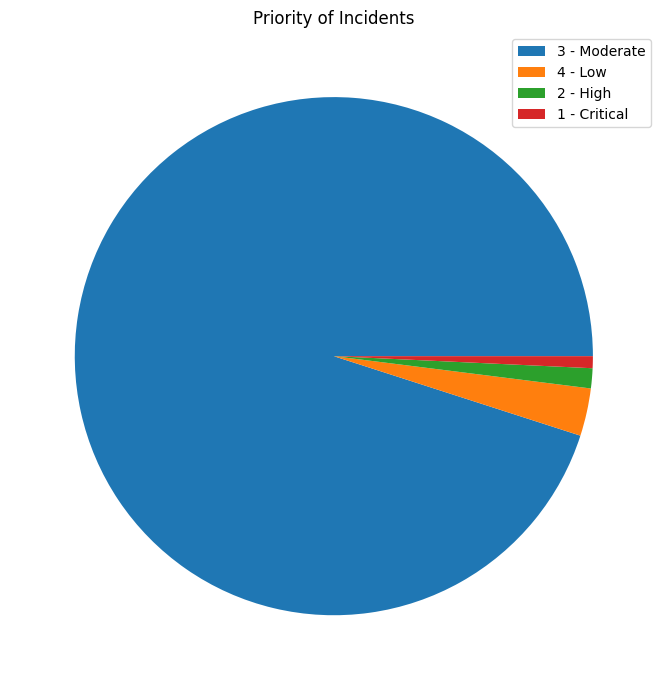

In [17]:
prio_counts =df['priority'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(prio_counts)
plt.legend(prio_counts.index,loc="best")
plt.title("Priority of Incidents")
plt.tight_layout()
plt.show()

# Bar Chart of Incidents by Month
This visualization shows the number of incidents created in each month.
By grouping incidents by their `opened_at` date, we can identify seasonal or monthly trends.
## 📌 Objective 
- To analyze **incident creation patterns across months**.
- To detect peaks or dips in activity.
- To provide a clear, time-based summary of incident

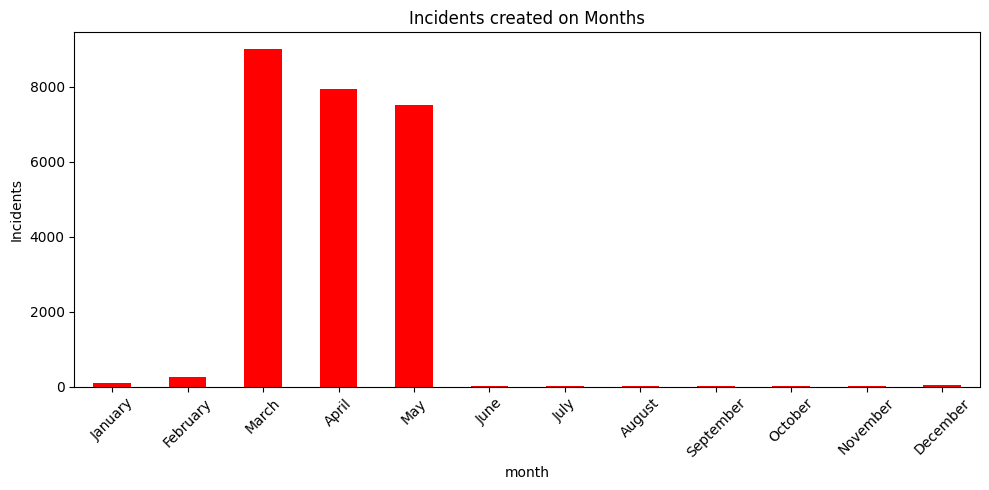

In [24]:
plt.figure(figsize=(10,5))
df['opened_at']=pd.to_datetime(df['opened_at'],dayfirst=True)
df['month']=df['opened_at'].dt.month_name()
month_counts=df['month'].value_counts()
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
month_counts = month_counts.reindex(month_order)
month_counts.plot(kind='bar', color='red')
plt.xlabel('month')
plt.ylabel('Incidents')
plt.title("Incidents created on Months")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram of Incident States
This visualization shows the frequency distribution of the `incident_state` column in the dataset.
By plotting a histogram, we can quickly see how incidents are spread across different states.
## 📌 Objective 
- To analyze the **distribution of incident states**.
- To identify which states occur most frequently.
- To provide a clear visual summary of incident

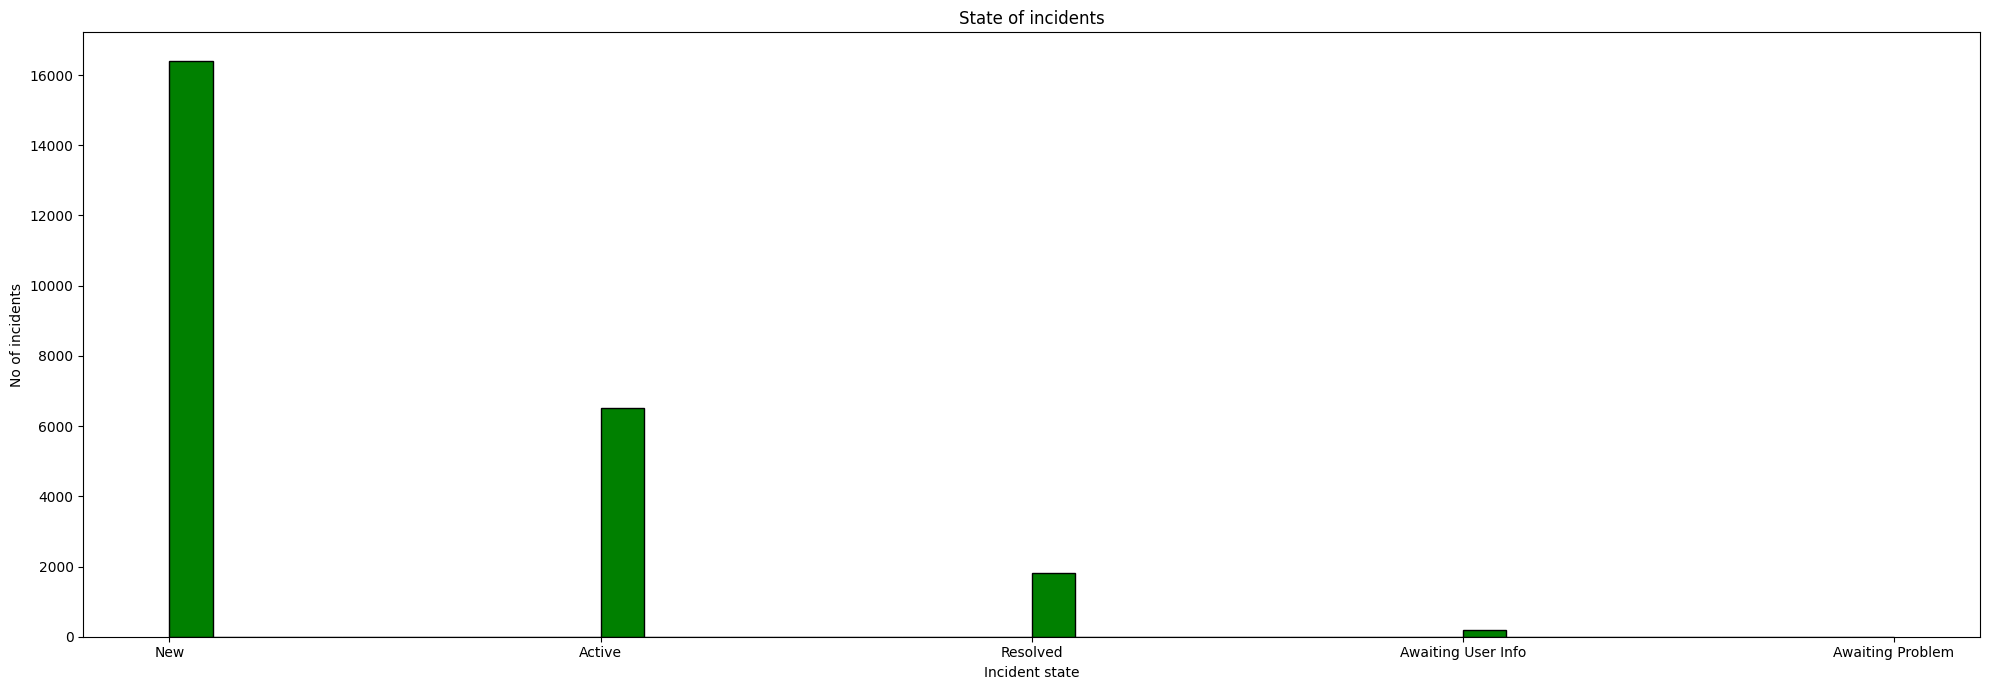

In [30]:
plt.figure(figsize=(20,7))
plt.hist(df['incident_state'],bins=40,color='green', edgecolor='black')
plt.xlabel('Incident state')
plt.ylabel('No of incidents')
plt.title('State of incidents')
plt.tight_layout()
plt.show()

# Boxplot Visualization: `sys_mod_count` by `priority`
This section documents the code that generates a boxplot to compare the distribution of the `sys_mod_count` variable across different `priority` categories in the dataset. 
## 📌 Objective The goal of this visualization is to:
- Understand how the number of system modifications (`sys_mod_count`) varies depending on the `priority` level.
- Identify differences in spread, median values, and outliers across categories.
- Provide a clear comparative view of data grouped by `priority`

<Figure size 3000x1500 with 0 Axes>

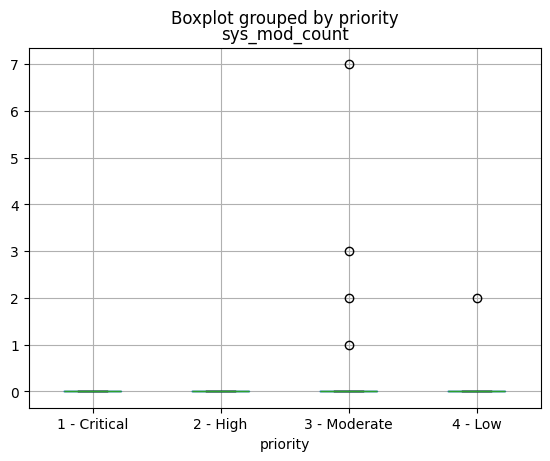

In [40]:
plt.figure(figsize=(30,15))
df.boxplot(column='sys_mod_count',by='priority')
plt.show()

# Pie Chart of SLA  of Incidents 
This visualization shows the distribution of incidents based on their **SLA (Service Level Agreement)** status.
A pie chart is used to highlight the proportion of incidents that met or breached SLA conditions. 
## 📌 Objective
- To visualize the **relative share of SLA categories** (e.g., Met vs Breached).
- To provide a quick overview of SLA compliance.
- To make the chart visually clear with labels, colors, and an exploded slice.

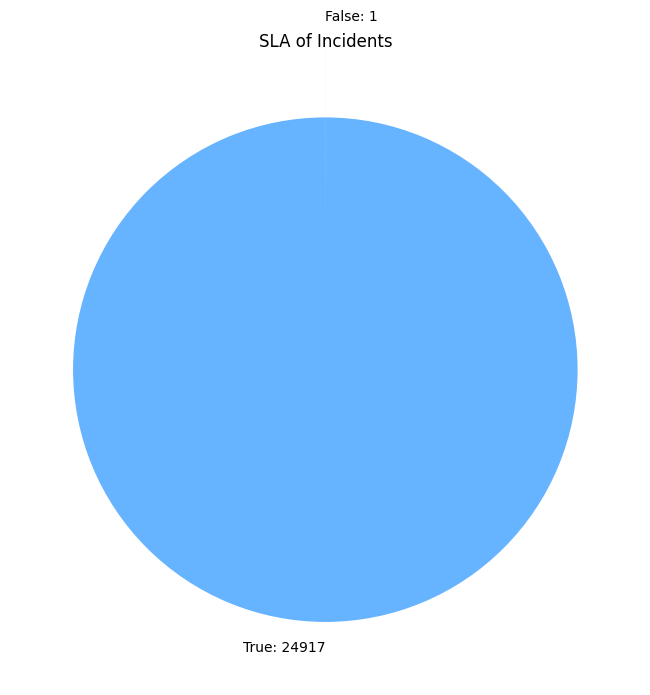

In [8]:
plt.figure(figsize=(7,7))
sla_counts = df['made_sla'].value_counts()
plt.pie(sla_counts.values,labels=[f"{label}: {count}" for label, count in zip(sla_counts.index, sla_counts.values)],startangle=90,explode=[0,0.3],colors=['#66b3ff','#ff9999'])
plt.title("SLA of Incidents")
plt.tight_layout()
plt.show()

# Bar Chart of Closed Codes for Incidents 
This visualization shows the **top 10 most frequent closed codes** in the dataset. 
By plotting a bar chart, we can quickly identify which closure reasons occur most often.
## 📌 Objective 
- To analyze the **distribution of incident closure codes**.
- To highlight the most common closure categories.
- To provide a clear visual summary for incident resolution patterns.

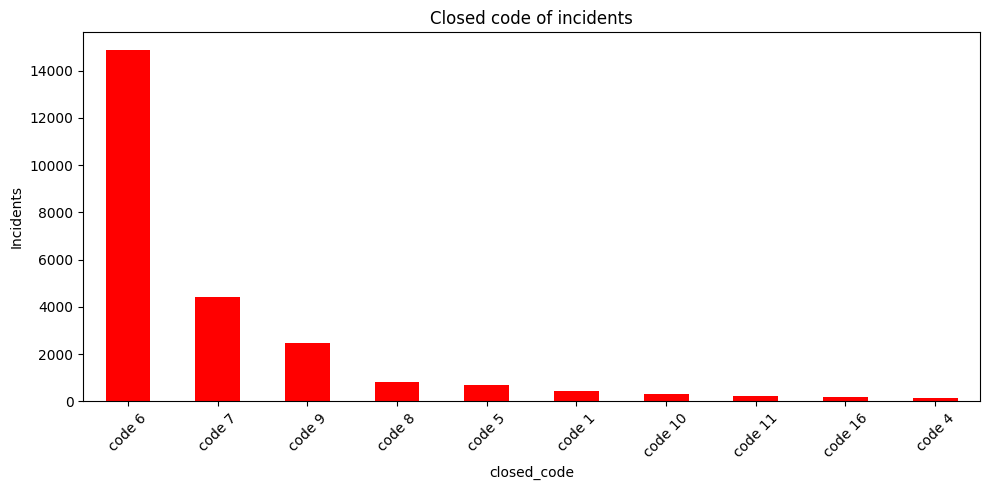

In [11]:
plt.figure(figsize=(10,5))
closed_counts = df['closed_code'].value_counts().head(10)
closed_counts.plot(kind='bar', color='red')
plt.xlabel('closed_code')
plt.ylabel('Incidents')
plt.title("Closed code of incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart of Top 10 Assignment Groups 
This visualization shows the **top 10 assignment groups** with the highest number of incidents. 
By plotting a bar chart, we can quickly identify which groups handle the most incidents.
## 📌 Objective
- To analyze the **distribution of incidents across assignment groups**.
- To highlight the busiest groups in terms of incident handling.
- To provide a clear comparative view of workload distribution.

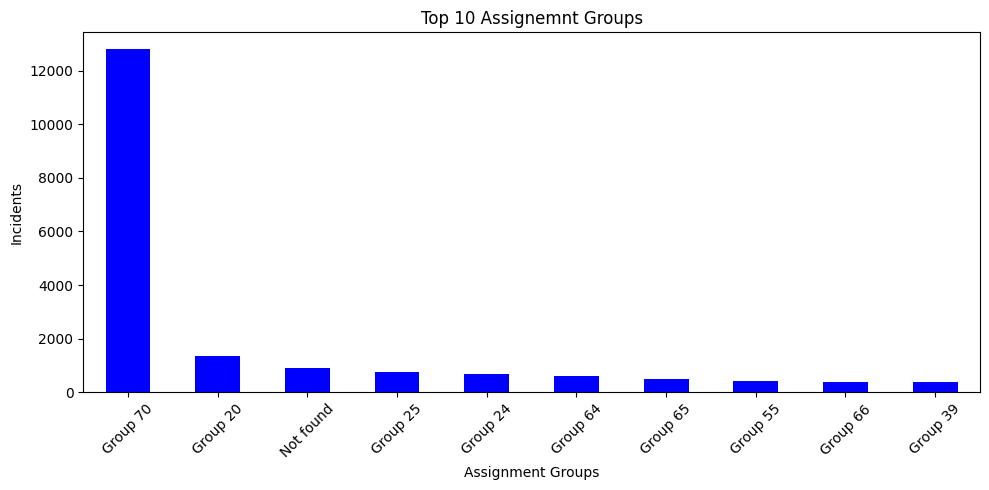

In [12]:
plt.figure(figsize=(10,5))
group_counts = df['assignment_group'].value_counts().head(10)
group_counts.plot(kind='bar', color='blue')
plt.xlabel('Assignment Groups')
plt.ylabel('Incidents')
plt.title("Top 10 Assignemnt Groups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart of Incident States 
This visualization shows the distribution of incidents across different **incident states**. 
A pie chart is used to highlight the proportion of incidents in each state. 
## 📌 Objective 
- To visualize the **relative share of incidents** by state.
- To quickly identify which states dominate the dataset.
- To provide a clear overview of incident status distribution.

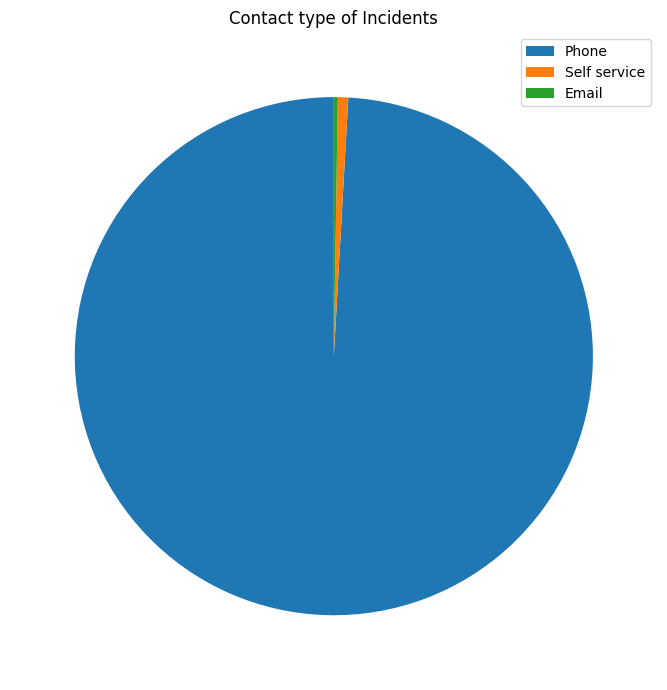

In [38]:
contact_counts =df['contact_type'].value_counts().head(3)
plt.figure(figsize=(7,7))
plt.pie(contact_counts.values,startangle=90,explode=[0,0,0])
plt.legend(contact_counts.index,loc="best")
plt.title("Contact type of Incidents")
plt.tight_layout()
plt.show()

# Bar Chart of Top 5 Assignment Groups
This visualization shows the **top 5 assignment groups** with the highest number of incidents.
By grouping incidents by `assignment_group`, we can identify which teams handle the most workload.
## 📌 Objective 
- To analyze the **distribution of incidents across assignment groups**.
- To highlight the busiest groups in terms of incident resolution.
- To provide a clear comparative view of workload concentration.

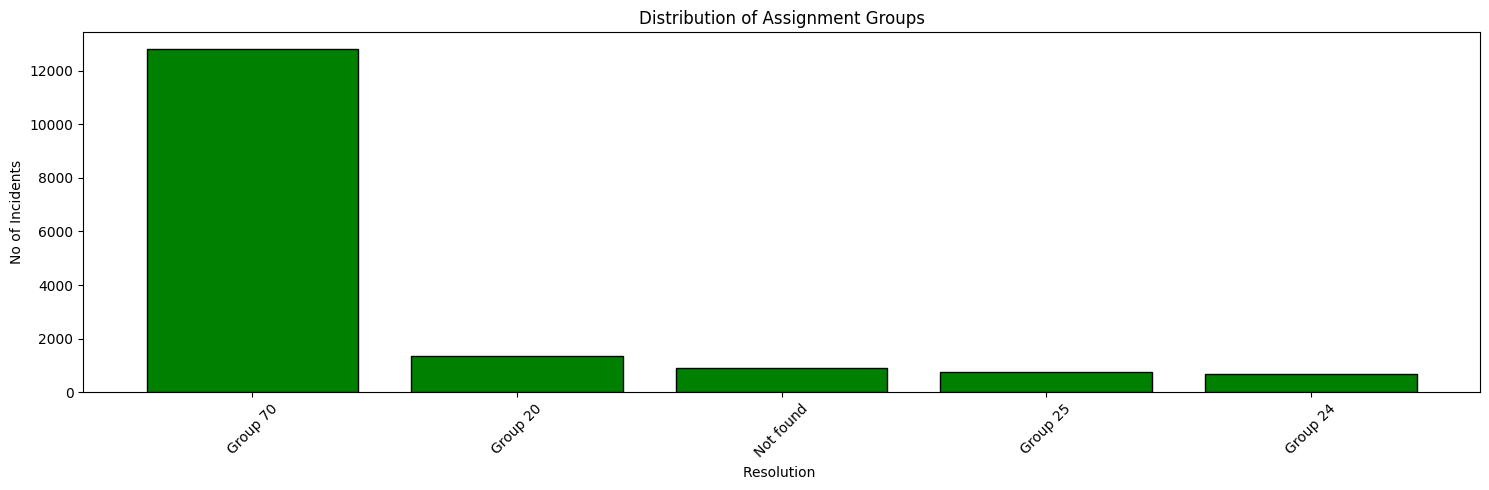

In [65]:
plt.figure(figsize=(15,5))
res_count=(df.groupby('assignment_group').size().reset_index(name='count').sort_values(by='count',ascending= False).head(5))

plt.bar(res_count['assignment_group'],res_count['count'],color='green', edgecolor='black')
plt.xlabel('Resolution ')
plt.ylabel('No of Incidents')
plt.title('Distribution of Assignment Groups')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Pie Chart of Top 5 Associates Who Worked on Incidents 
This visualization shows the **top 5 associates** (individuals assigned to incidents) and their relative share of workload.
A pie chart is used to highlight the proportion of incidents handled by each associate. 
## 📌 Objective
- To identify the **top contributors** in incident resolution.
- To visualize workload distribution among associates.
- To provide a clear overview of which individuals handled the most incidents. 

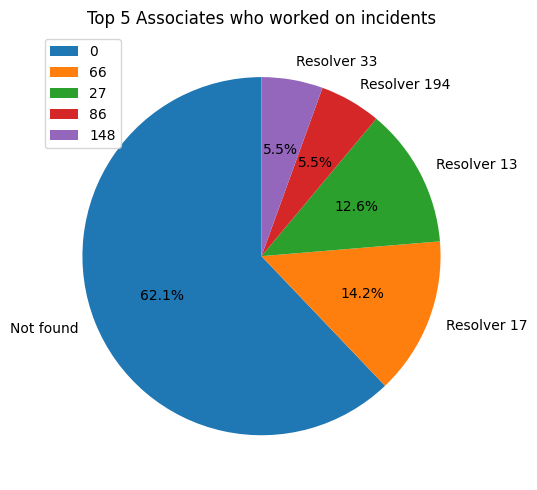

In [25]:
plt.figure(figsize=(15,5))

to_count=(df.groupby('assigned_to').size().reset_index(name='count').sort_values(by='count',ascending= False).head(5))

to_count['assigned_to'] = to_count['assigned_to'].astype(str)

plt.pie(to_count['count'],labels=to_count['assigned_to'],autopct='%1.1f%%', startangle=90)

plt.legend(to_count.index,loc="best")
plt.title("Top 5 Associates who worked on incidents")
plt.tight_layout()
plt.show()

# Final Analysis



# Priority Distribution of Incidents




## 🔎 Key Observations

- **Dominance of "3 - Moderate" Incidents**
  - The majority of incidents fall under the *Moderate* category.
  - This indicates that most issues are routine operational concerns—neither urgent nor trivial.

- **Rarity of "1 - Critical" Incidents**
  - Critical incidents form the smallest segment.
  - Suggests that truly urgent cases are rare, implying system stability and effective management.

- **Balanced Presence of "2 - High" and "4 - Low"**
  - Both categories appear in smaller proportions.
  - Reinforces the skew toward moderate severity, with fewer extremes at either end.

---

## 📈 Interpretation
- The distribution highlights that the system primarily deals with **moderate-level issues**, reflecting a stable environment.
- The **low frequency of critical incidents** suggests resilience and reliability in operations.
- The **presence of high and low priorities**, though limited, ensures that the system addresses both urgent and minor concerns when they arise.

---

## ✅ Conclusion
The incident priority distribution emphasizes:
- **Operational stability** with minimal emergencies.
- **Routine workload** dominated by moderate issues.
- **Balanced handling** of high and low severity cases.

This analysis can guide resource allocation, ensuring that teams remain focused on managing the bulk of moderate incidents while staying prepared for occasional critical cases.



 # Monthly Distribution of Incident Creation

Incident volumes are not evenly spread across the year, with a dramatic concentration in the spring quarter.


## 🔎 Key Observations

- **Spring Surge (March–May)**
  - March registers the **highest peak**, with over **9,000 incidents**.
  - April and May follow closely, reinforcing the seasonal spike.
  - This concentrated activity suggests operational strain or heightened system usage during this period.

- **Minimal Activity in Other Months**
  - Incident counts across the remaining months are close to **zero**.
  - Highlights a stark disparity in workload distribution throughout the year.

---

## 📈 Interpretation
- The **spring quarter surge** may be linked to:
  - Business

#  Distribution of Incident States



## 🔎 Key Observations

- **"New" State Dominance**
  - Over **16,000 incidents** are in the *New* state.
  - Indicates a significant backlog or continuous inflow of newly reported issues awaiting triage.

- **"Active" State**
  - Approximately **6,500 incidents** are under investigation or being worked on.
  - Reflects ongoing operational effort but also suggests workload concentration in this stage.

- **"Resolved" State**
  - Sharp drop to around **2,000 incidents**.
  - Highlights a potential bottleneck in resolution or closure processes, where fewer cases reach completion compared to inflow.

- **Minimal Counts in "Awaiting User Info" and "Awaiting Problem"**
  - Very few incidents fall into these categories.
  - Could imply efficient user communication or underutilization of these workflow states.



# Modification Frequency by Incident Priority

## 📊 Overview
Overall, the distributions are tightly compressed near zero, showing that most incidents undergo very few modifications regardless of priority.



## 🔎 Key Observations

- **Moderate Priority**
  - Widest spread of outliers, with some incidents modified up to **7 times**.
  - Suggests that while most moderate incidents are straightforward, a subset requires extensive updates—possibly due to unclear scope or prolonged resolution cycles.

- **Low Priority**
  - Occasional outliers, though less extreme than moderate.
  - Indicates edge cases that may have been deprioritized but still needed multiple revisions.

- **Critical & High Priority**
  - Minimal modification activity despite urgency.
  - Reflects streamlined handling protocols or rapid resolution workflows that minimize back-and-forth updates.



- Most incidents are resolved with minimal updates.
- A small subset—especially within **moderate priority**—requires deeper investigation.
- Addressing these exceptions can enhance overall efficiency and reduce resolution cycles.


## 📊 Closed Code of Incidents — Analysis

The distribution is highly uneven, with a few codes dominating the majority of closures.

### 🔍 Key Observations
- **Code 6** stands out with around 14,000 incidents, far more than any other code.  
- **Code 7** follows with roughly 4,000 incidents, making it the second most common closure.  
- **Code 9** accounts for about 2,500 incidents, a moderate share compared to the top two.  
- All other codes (1, 4, 5, 8, 10, 11, 16) each contribute fewer than 1,000 incidents, showing very limited usage.

### 📌 Interpretation
- The overwhelming use of **Code 6** suggests it may be a default or overly broad category.  


### ✅ Recommendations
- **Audit Code 6 usage** to check if incidents are being classified correctly.  
- **Clarify definitions** of all codes to ensure consistent application.  
- **Consider merging or revising low-frequency codes** to simplify the closure process.  
- **Use these insights for training** so teams apply codes more accurately and consistently.

## 📊 Top 10 Assignment Groups — Analysis

Analysis  provides insight into workload concentration and potential resource allocation needs.

### 🔍 Key Observations

- **Group 70** is the clear outlier, handling over 12,000 incidents — far more than any other group.
- The remaining groups (Group 20, Group 25, Group 24, Group 64, etc.) each manage fewer than 2,000 incidents.
  

### 📌 Interpretation

- The dominance of **Group 70** suggests a central role in incident resolution, but may also point to overburdening or lack of distribution.
- The steep drop-off after Group 70 reflects a highly skewed workload, potentially leading to bottlenecks or delays.
- The presence of **"Not found"** implies data quality issues that should be addressed to ensure accurate reporting.

### ✅ Recommendations

- **Investigate Group 70’s workload** to assess whether redistribution is needed or if automation can help.
- **Review assignment logic** to ensure incidents are routed efficiently across available groups.
- **Fix data gaps** by resolving the "Not found" entries and improving assignment group mapping.
- **Use this insight to guide staffing and training** — ensuring that high-volume groups are adequately supported.

##  Contact Type of Incidents — Analysis


It reveals strong preferences in communication methods and highlights potential areas for digital adoption.

### 🔍 Key Observations

- **Phone** is the dominant contact method, accounting for the vast majority of incidents.
- **Self-service** and **Email** are used far less frequently, represented by very thin slices in the chart.

### 📌 Interpretation

- The overwhelming reliance on **Phone** suggests users prefer direct, real-time interaction when reporting issues.
- The minimal use of **Self-service** and **Email** may indicate:
  - Lack of awareness or accessibility.
  - Limited trust in asynchronous or automated channels.
  - Possible usability issues in the self-service platform.

### ✅ Recommendations

- **Promote self-service options** through awareness campaigns and improved user experience.
- **Analyze phone interactions** to identify common issues that could be resolved via automation.
- **Encourage email usage** for non-urgent or follow-up communications.
- **Monitor trends over time** to assess shifts in user behavior and adapt support strategies accordingly.

##  Top 5 Associates Who Worked on Incidents — Analysis

 
Analysis reveals a significant gap in attribution, with many incidents not linked to any specific individual.

### 🔍 Key Observations

- **"Not found"** accounts for **62.1%** of incidents, indicating a major data attribution issue.
- **Resolver 17** handled **14.2%** of incidents, making them the most active among named associates.
- **Resolver 13** contributed **12.6%**, followed by **Resolver 194** and **Resolver 33**, each with **5.5%**.


### 📌 Interpretation

- The high percentage of **unattributed incidents** suggests gaps in tracking or data entry processes.
- Named resolvers show relatively balanced contributions, but their combined share is still far below the "Not found" category.


### ✅ Recommendations

- **Investigate the "Not found" category** to understand why so many incidents lack resolver attribution.
- **Improve data capture processes** to ensure every incident is linked to a responsible associate.
- **Use this insight to guide accountability and performance tracking**, ensuring fair recognition and workload distribution.